In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install empiricaldist

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.8.0-py3-none-any.whl size=12556 sha256=f1d2e89dcea7ac2594d149dfa715f30fcd205f69748c68764b69870c9fad2200
  Stored in directory: /root/.cache/pip/wheels/ca/a9/1f/90c7a8a37ac37ff0fa0a27b2152f9b24be8910448ab93992f8
Successfully built empiricaldist


In [5]:
import empiricaldist

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

titanic_color = {
    'First': '#ff6602ff',
    'Second': '#0f7175ff',
    'Third': '#c65dc9ff'
}

titanic_sex_color = {
    'male': '#ff6602ff',
    'female': '#0f7175ff'
}

In [3]:
titanic_df = sns.load_dataset('titanic')
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Función de probabilidad de masas (PMFs)

In [6]:
empiricaldist.Pmf.from_seq(
    titanic_df.age,
    normalize=True
)

,
age,
0.42,0.001401
0.67,0.001401
0.75,0.002801
0.83,0.002801
0.92,0.001401
...,...
70.00,0.002801
70.50,0.001401
71.00,0.002801


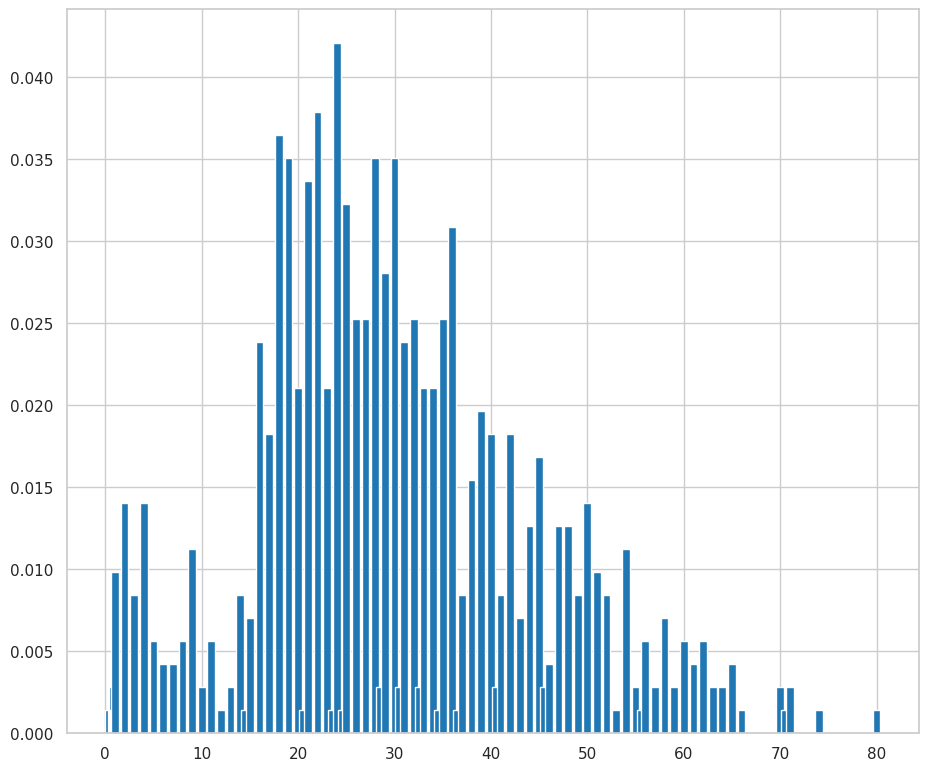

In [8]:
pmf_titanic_df_age = empiricaldist.Pmf.from_seq(
    titanic_df.age,
    normalize=True
)

pmf_titanic_df_age.bar()

la probabilidad de que en titanic hubiera una persona de 78 años y 20

In [11]:
pmf_titanic_df_age(78)

0

In [12]:
pmf_titanic_df_age(20)

0.02100840336134454

Función de distribución acumulada (CDFs)

In [13]:
cdf_titanic_df_age = empiricaldist.Cdf.from_seq(
    titanic_df.age,
    normalize=True
)
cdf_titanic_df_age

,
age,
0.42,0.001401
0.67,0.002801
0.75,0.005602
0.83,0.008403
0.92,0.009804
...,...
70.00,0.992997
70.50,0.994398
71.00,0.997199


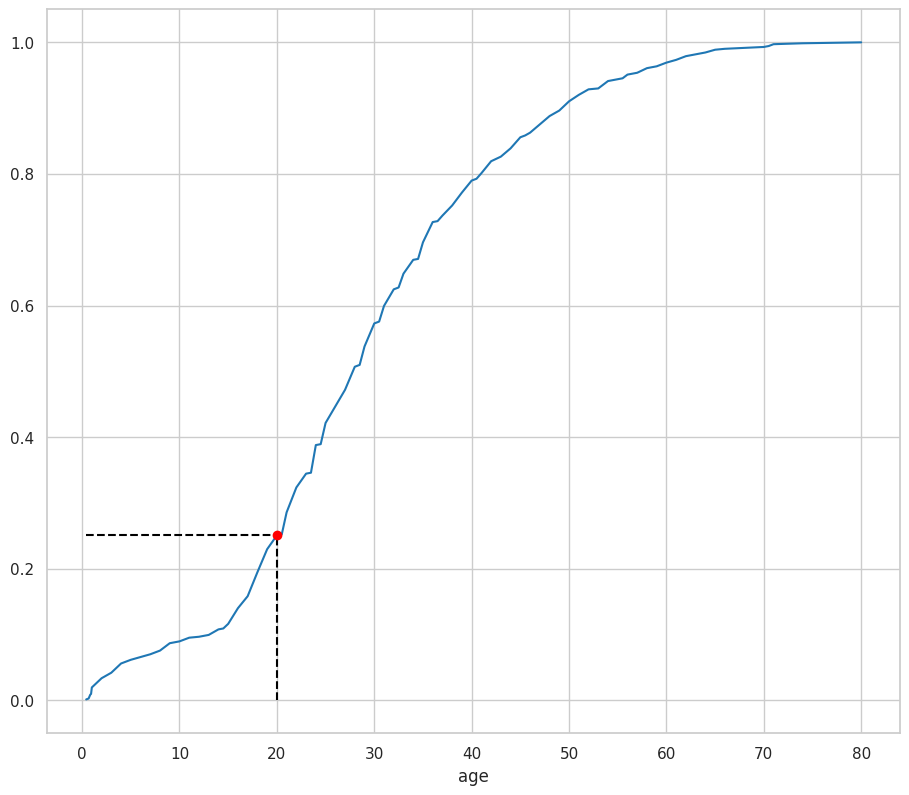

In [14]:
cdf_titanic_df_age.plot()
q = 20
p = cdf_titanic_df_age.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=cdf_titanic_df_age.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q, p, 'ro')

In [ ]:
sns.histplot (
    data=titanic_df,
    x='age',
    hue=
    palette=titanic_sex_color,
    binwidth = 1,
    stat='probability'
)